In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from matplotlib import cm
from matplotlib.colors import Normalize

In [108]:


# Directory containing CSV files to merge
directory = 'D:\Data Analyst Course\Python\Sales_data'

# List to store DataFrames
dfs = []

# Iterate over each CSV file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Read CSV file into DataFrame
        df = pd.read_csv(os.path.join(directory, filename))
        # Append DataFrame to list
        dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
df=combined_df
# Write combined DataFrame to a new CSV file
df.to_csv('combined.csv', index=False)

# Lets Start Data Cleaning process........

In [109]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Missing Values (NaN or Null Values)

In [110]:
 #checking how much data have null values
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [111]:
df.shape

(186850, 6)

# Removing null values from Dataframe 

In [112]:
df.dropna(how="all", inplace=True)
#clean_df=df.dropna(how='any')
#clean_df.isnull().sum()
df.isnull().sum()


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [113]:
df.info()  # Checking Data set information like no. of rows , columns,datatype,and memory uses

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


# Checking Duplicate Rows in Dataset

In [114]:
df.duplicated().sum() # Checking how much data is duplicated 

618

# Remove Duplicates from Dataframe 

In [115]:
df=df.drop_duplicates(keep='last')
#clean_df=clean_df.drop_duplicates(keep='last')
#clean_df.duplicated().sum()
#clean_df.isnull().sum()
df.duplicated().sum()

0

# Checking Unique Values in each columns 

In [116]:
unique={}
for i in df.columns:
    unique[i]=df[i].unique() #checking uniue values of each columns
unique

{'Order ID': array(['176558', '176559', '176560', ..., '259355', '259356', '259357'],
       dtype=object),
 'Product': array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
        'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
        'Lightning Charging Cable', '27in 4K Gaming Monitor',
        'AA Batteries (4-pack)', 'Apple Airpods Headphones',
        'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
        '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
        'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor',
        'Product'], dtype=object),
 'Quantity Ordered': array(['2', '1', '3', '5', '4', '7', '6', '8', '9', 'Quantity Ordered'],
       dtype=object),
 'Price Each': array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
        '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
        '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
        '400.0', 'Price Each'], dtype=o

# Removing inconsistance data from columns

In [117]:
unique={}
for i in df.columns:
    df=df.drop(df[df[i]==i].index)#removing columns name which present in columns data like 'Quantity Ordered','Price Each'
    unique[i]=df[i].unique()
    
unique # checking unique values after removing inconsistance data

{'Order ID': array(['176558', '176559', '176560', ..., '259355', '259356', '259357'],
       dtype=object),
 'Product': array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
        'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
        'Lightning Charging Cable', '27in 4K Gaming Monitor',
        'AA Batteries (4-pack)', 'Apple Airpods Headphones',
        'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
        '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
        'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
       dtype=object),
 'Quantity Ordered': array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object),
 'Price Each': array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
        '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
        '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
        '400.0'], dtype=object),
 'Order Date': array(['04/19/19 08:46', '04/0

# Checking Inconsistent Data Types 

In [118]:
df.dtypes # Checking Data types of all columns 

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

# Changing Data Type of columns according to data

In [119]:
df["Order ID"]=df["Order ID"].astype(int)
df["Quantity Ordered"]=df["Quantity Ordered"].astype(int)
df["Price Each"]=df["Price Each"].astype(float)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')
df.dtypes

Order ID                     int32
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

# Renaming Columns name 

In [120]:
df = df.rename(columns={'Order ID': 'Order_id', 'Product': 'Product_name','Quantity Ordered':'Quantity_Ordered',
                        'Price Each':'Product_price','Order Date':'Order_date','Purchase Address':'Purchase_address'})
df

,Order_id,Product_name,Quantity_Ordered,Product_price,Order_date,Purchase_address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


# Checking duplicated rows in Dataframe 

In [121]:
df[df.duplicated(keep= False)]

,Order_id,Product_name,Quantity_Ordered,Product_price,Order_date,Purchase_address


In [122]:
df.drop_duplicates(keep='last')
df.duplicated().sum()


0

# Checking Inconsistent Values in data frame 

In [123]:
v_count={}

for i in df.columns:
       v_count[i]=df[i].value_counts()
        
v_count

{'Order_id': Order_id
 160873    5
 296353    4
 304802    4
 235798    4
 194253    4
          ..
 158126    1
 158127    1
 158128    1
 158129    1
 259357    1
 Name: count, Length: 178437, dtype: int64,
 'Product_name': Product_name
 USB-C Charging Cable          21859
 Lightning Charging Cable      21610
 AAA Batteries (4-pack)        20612
 AA Batteries (4-pack)         20558
 Wired Headphones              18849
 Apple Airpods Headphones      15525
 Bose SoundSport Headphones    13298
 27in FHD Monitor               7498
 iPhone                         6840
 27in 4K Gaming Monitor         6225
 34in Ultrawide Monitor         6174
 Google Phone                   5522
 Flatscreen TV                  4794
 Macbook Pro Laptop             4721
 ThinkPad Laptop                4126
 20in Monitor                   4098
 Vareebadd Phone                2065
 LG Washing Machine              666
 LG Dryer                        646
 Name: count, dtype: int64,
 'Quantity_Ordered': Quantity_

# Describe data to check max, min, count , mean.....

In [124]:
df.describe()

,Order_id,Quantity_Ordered,Product_price,Order_date
count,185686.000000,185686.000000,185686.000000,185686
mean,230411.376227,1.124544,184.519255,2019-07-18 21:32:06.298051840
min,141234.000000,1.000000,2.990000,2019-01-01 03:07:00
25%,185833.250000,1.000000,11.950000,2019-04-16 20:55:15
50%,230354.500000,1.000000,14.950000,2019-07-17 20:11:00
75%,275028.750000,1.000000,150.000000,2019-10-26 08:00:00
max,319670.000000,9.000000,1700.000000,2020-01-01 05:13:00
std,51511.717183,0.443069,332.843838,NaN


# Checking how much % data is null

In [125]:
df.isnull().sum()/combined_df.isnull().count()*100 #how much % data null 

Order Date         NaN
Order ID           NaN
Order_date         NaN
Order_id           NaN
Price Each         NaN
Product            NaN
Product_name       NaN
Product_price      NaN
Purchase Address   NaN
Purchase_address   NaN
Quantity Ordered   NaN
Quantity_Ordered   NaN
dtype: float64

# How much % data duplcated 

In [126]:
df.duplicated().sum()/df.duplicated().count()*100 # How much % data duplcated 

0.0

# Checking How many rows in DataFrame are Completely Null

In [127]:
df.isnull().all(axis=1).sum() #how much data is completely null 

0

# Performing Analysis on Data frame------

In [128]:
df.head(7)

,Order_id,Product_name,Quantity_Ordered,Product_price,Order_date,Purchase_address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101"


# Seperating months name or  date from Datetime column

In [129]:
df['Month'] = df['Order_date'].dt.month # it will months no.
df['Month_name']=df['Order_date'].dt.strftime('%B') # it will comlete months names 

#df['Months_names'] = df['Order_date'].dt.strftime('%b') # it will give only starting 3 char of months 
df['Dates'] = df['Order_date'].dt.date  # Its will seperate Date from Datetime 
df['Time']=df['Order_date'].dt.time
df['Day']=df['Order_date'].dt.day_name()
df['Hour'] = df["Order_date"].dt.hour

df.head(3)

,Order_id,Product_name,Quantity_Ordered,Product_price,Order_date,Purchase_address,Month,Month_name,Dates,Time,Day,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,2019-04-19,08:46:00,Friday,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,2019-04-07,22:30:00,Sunday,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019-04-12,14:38:00,Friday,14


# Putting , between (state and ZIP)

In [130]:
# Splitting the address by the last two components (state and ZIP)
state_zip_split = df['Purchase_address'].str.rsplit(n=1, expand=True)

# Inserting a comma between the state and ZIP code
state_zip_split[0] = state_zip_split[0] + ','
df['Purchase_address'] = state_zip_split[0] + state_zip_split[1]
df.head()

,Order_id,Product_name,Quantity_Ordered,Product_price,Order_date,Purchase_address,Month,Month_name,Dates,Time,Day,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX,75001",4,April,2019-04-19,08:46:00,Friday,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA,02215",4,April,2019-04-07,22:30:00,Sunday,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA,90001",4,April,2019-04-12,14:38:00,Friday,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA,90001",4,April,2019-04-12,14:38:00,Friday,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA,90001",4,April,2019-04-30,09:27:00,Tuesday,9


# Seperatting Street ,City,State, and ZIP from Purchase_address column

In [131]:

# Separate specific characters from 'Purchase_address' column
df['Street'] = df['Purchase_address'].str.split(',').str[0]
df['City'] = df['Purchase_address'].str.split(',').str[1]
df['State'] = df['Purchase_address'].str.split(',').str[2]
df['ZIP'] = df['Purchase_address'].str.split(',').str[3]

# Display DataFrame with separated characters
df.head(3)


,Order_id,Product_name,Quantity_Ordered,Product_price,Order_date,Purchase_address,Month,Month_name,Dates,Time,Day,Hour,Street,City,State,ZIP
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX,75001",4,April,2019-04-19,08:46:00,Friday,8,917 1st St,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA,02215",4,April,2019-04-07,22:30:00,Sunday,22,682 Chestnut St,Boston,MA,02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA,90001",4,April,2019-04-12,14:38:00,Friday,14,669 Spruce St,Los Angeles,CA,90001


# Problems Statements on Sales Dataset

In [132]:
1. Find Sales trends months wise
2. What is preferred Day most people placed orders
2. What time most people place the order
4. Find max, average , and min price on ordered product 
5. find top 5 most selling products
6. find top 5 customer who order most product 
7. Find which state ordering most of product 
8. Find most ordering product by most ordering state  
9. Find which product gives maximum sales

SyntaxError: invalid syntax (3759065692.py, line 1)

# Lets Start Visualization...............

In [133]:

months_sale=df[['Product_price','Month_name']].groupby('Month_name').sum().sort_values('Product_price')
percent_sales=(months_sale/months_sale['Product_price'].sum()*100).round(2)
percent_sales.sort_values('Month_name', ascending=True)

percent_sales

,Product_price
Month_name,
January,5.29
September,6.08
February,6.38
August,6.50
June,7.47
July,7.68
March,8.14
May,9.14
November,9.28


# Finding Sales trends months wise

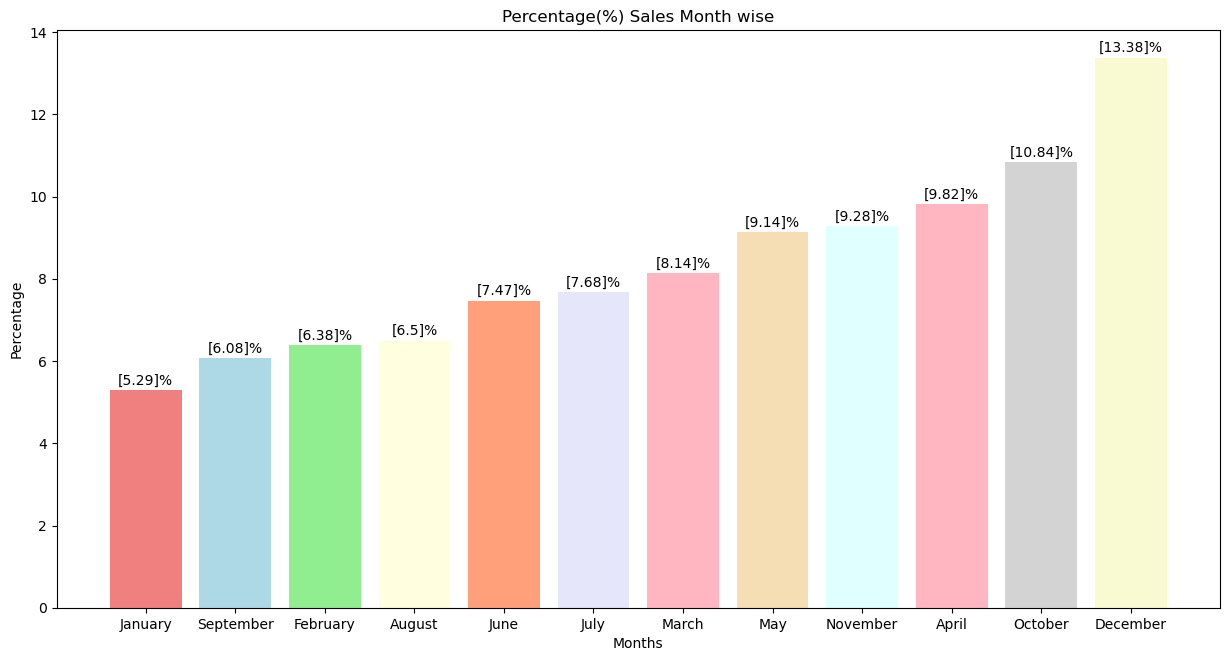

In [134]:
plt.figure(figsize=(15,7.5))
plt.bar(x=percent_sales.index, height=percent_sales['Product_price'],
        color = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow', 'lightsalmon', 
                 'lavender', 'lightpink', 'wheat', 'lightcyan', 'lightpink', 'lightgray', 'lightgoldenrodyellow'])

offset= max(percent_sales['Product_price']) * 0.01

#for i,j in enumerate(percent_sales.values):
#    plt.text(percent_sales.index[i], percent_sales.values[i] + offset, str(f"{j}%"), ha='center')
for i,j in enumerate(percent_sales.values):
    plt.text(percent_sales.index[i], percent_sales.values[i]+ offset, str(f'{j}%'), ha='center')


plt.title("Percentage(%) Sales Month wise")
plt.xlabel("Months")
plt.ylabel("Percentage")
plt.show()



In [135]:
# Conclusion: To Increase sales make enough stock in April, Octuber , November, and December months and run adds

# What is preferred Day most people placed orders

In [136]:
sale_day=df[['Day','Order_id']].groupby('Day').count().sort_values('Order_id',ascending=True)
#percentage_sale_day=sale_day/sale_day.sum()*100
#percentage_sale_day
#sale_day.sort_values('Order_id',ascending=False)
sale_day

,Order_id
Day,
Friday,26214
Thursday,26418
Wednesday,26438
Saturday,26453
Monday,26508
Sunday,26518
Tuesday,27137


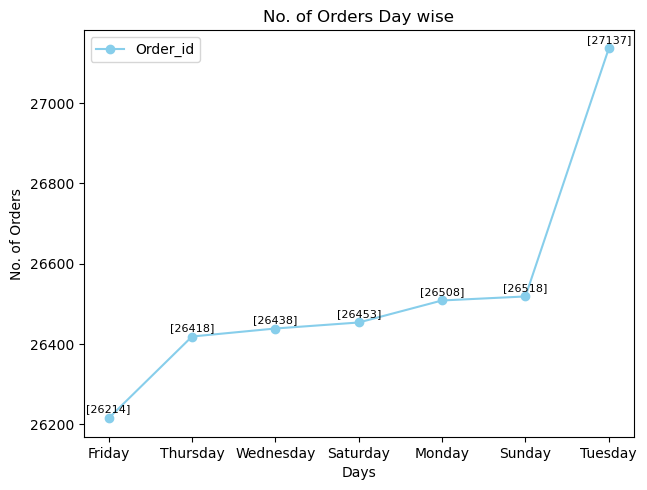

In [137]:
offset=10
sale_day.plot(color='skyblue', marker='o', linestyle='-')

for i,j in enumerate(sale_day.values):
    plt.text(i, j+offset, str(j), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.title("No. of Orders Day wise")
plt.xlabel("Days")
plt.ylabel("No. of Orders")
plt.show()

In [138]:
# Conclusion: In order to increase sale make enough stock available on Monday, Sunday and Tuesday  

In [139]:
#Find max, average , and min price on ordered product 
max_min_price=df[["Product_price"]].describe()
max_min_price =max_min_price.drop("count")
max_min_price =max_min_price.drop("std")
max_min_price =max_min_price.drop("75%")
max_min_price =max_min_price.drop("25%")
max_min_price =max_min_price.drop("50%")
max_min_price

,Product_price
mean,184.519255
min,2.990000
max,1700.000000


# Finding Top 5 most selling products

In [140]:
top_sale_product=df[['Product_name','Quantity_Ordered']].groupby('Product_name').sum().head(5).sort_values(
    'Quantity_Ordered',ascending=True)
top_sale_product


,Quantity_Ordered
Product_name,
20in Monitor,4126
34in Ultrawide Monitor,6192
27in 4K Gaming Monitor,6239
27in FHD Monitor,7541
AA Batteries (4-pack),27615


C:\Users\dell\AppData\Local\Temp\ipykernel_26220\2157276532.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')
C:\Users\dell\AppData\Local\Temp\ipykernel_26220\2157276532.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(cm.ScalarMappable(norm=normalize, cmap=cmap))


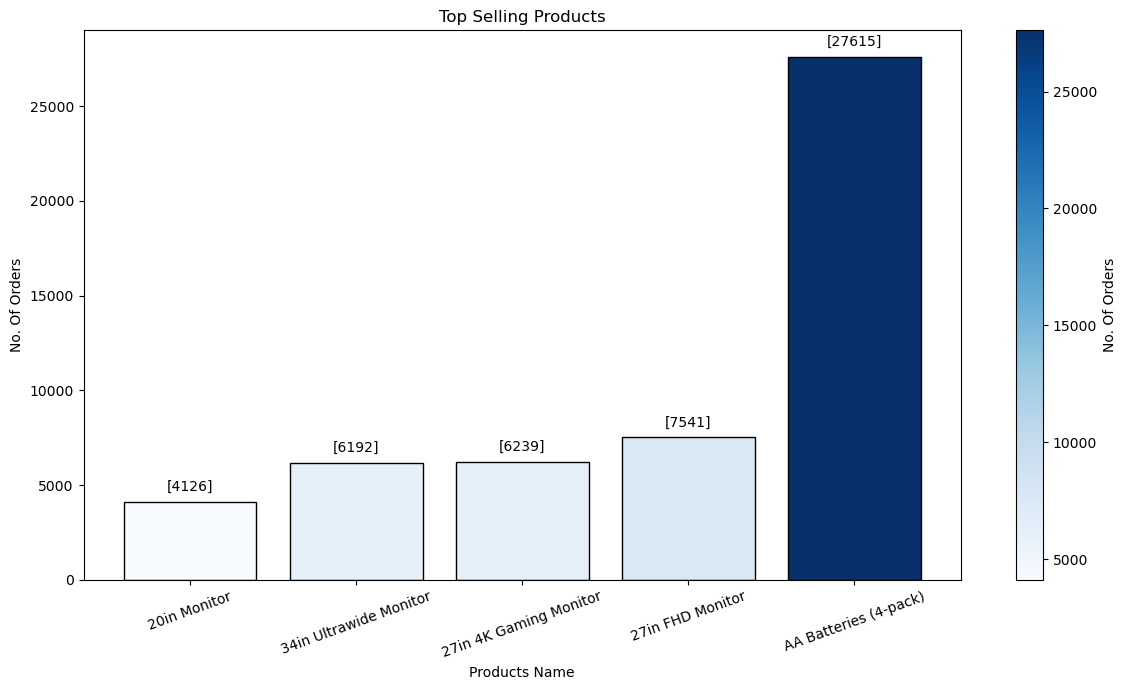

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm


# Calculate top selling products
top_sale_product = df[['Product_name','Quantity_Ordered']].groupby('Product_name').sum().head().sort_values(
    'Quantity_Ordered',ascending=True)

# Define colormap with varying saturation levels
cmap = cm.get_cmap('Blues')

# Normalize data
normalize = plt.Normalize(vmin=top_sale_product['Quantity_Ordered'].min(), vmax=top_sale_product['Quantity_Ordered'].max())

# Plot the bar plot
plt.figure(figsize=(12, 7))
plt.bar(x=top_sale_product.index, height=top_sale_product['Quantity_Ordered'], 
               color=cmap(normalize(top_sale_product['Quantity_Ordered'])), edgecolor='black')

# Add colorbar
cbar = plt.colorbar(cm.ScalarMappable(norm=normalize, cmap=cmap))
cbar.set_label('No. Of Orders')
offset= max(top_sale_product['Quantity_Ordered']) * 0.02
for i,j in enumerate(top_sale_product.values):
    plt.text(top_sale_product.index[i], top_sale_product.values[i]+offset,str(j),ha='center')

plt.title('Top Selling Products')
plt.xlabel('Products Name')
plt.ylabel('No. Of Orders')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


In [142]:
#Conclusion : In order to increase sales focus on top 5 products and start advertise these product 

#  Which state ordering more products

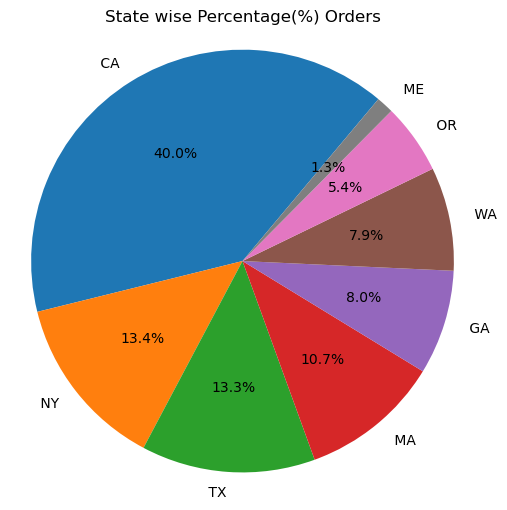

In [143]:
state_order= df[['Order_id','State']].groupby('State').count().sort_values('Order_id',ascending= False)
Percent_order_state=(state_order/state_order.sum()*100).round(2)


plt.figure(figsize=(6,6))  # Optional: Adjust the size of the pie chart
plt.pie(Percent_order_state['Order_id'], labels=Percent_order_state.index, autopct='%1.1f%%', startangle=50) 

plt.title('State wise Percentage(%) Orders')  # Optional: Add a title
plt.axis('equal') 
plt.show()

In [144]:
# Conclusion: In Order to increase sales, Imporove avderticing in CA, TX , and NY state  

# How price is distributed understanding by Violin Plot

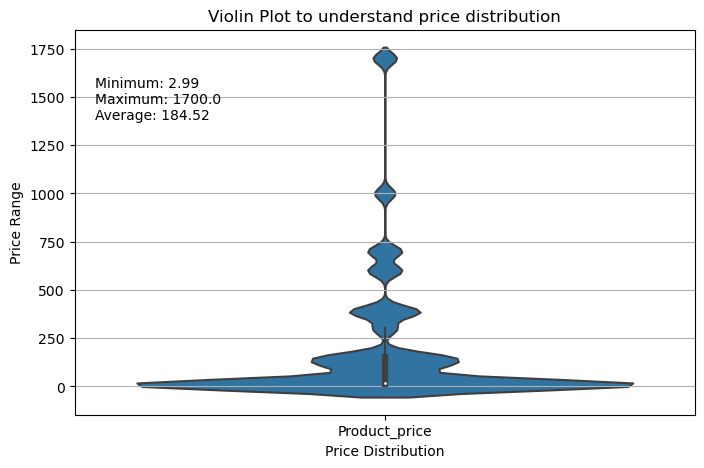

In [145]:
data=df[["Product_price"]]
minimum = np.min(data)
maximum = np.max(data)
average = np.mean(data)
plt.figure(figsize=(8,5))
# Create a violin plot
sns.violinplot(data)

minimum = np.min(data)
maximum = np.max(data)
average = np.mean(data)
                  
plt.title('Violin Plot to understand price distribution')
plt.xlabel('Price Distribution')
plt.ylabel('Price Range')
plt.figtext(0.15, 0.7, f'Minimum: {minimum:.2f}\nMaximum: {maximum:.1f}\nAverage: {average:.2f}', fontsize=10, ha='left')
plt.grid(axis='y')
plt.show()

In [146]:
# Conclusion: most people ordering product with price range min 2.99 to 250 , and 2nd most people ordring product 300 t0 450  so this price give discount to increase sales or run adds on this price so that people can buy more 

# Understanding price distribution sales trends by histogram​

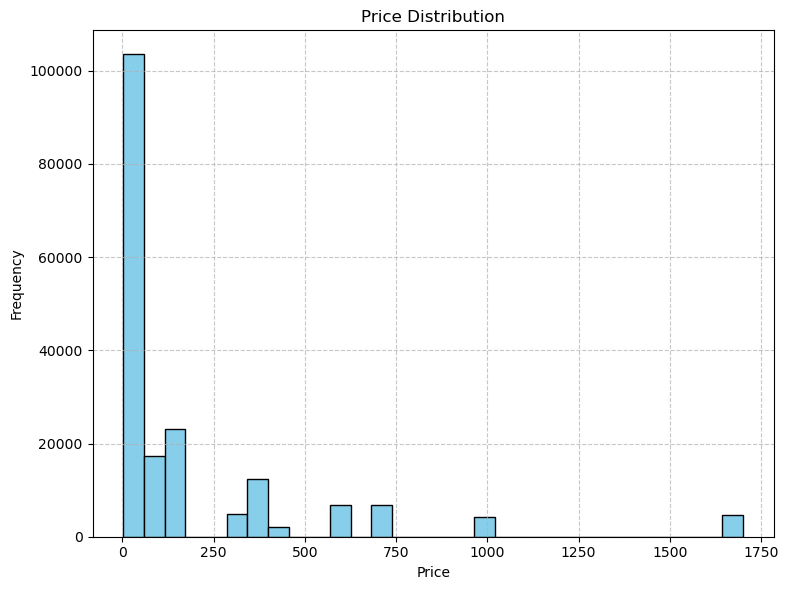

In [147]:
plt.figure(figsize=(8, 6))
prices=df['Product_price']
plt.hist(prices, bins=30, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Understanding price distibution sales trends by KDE

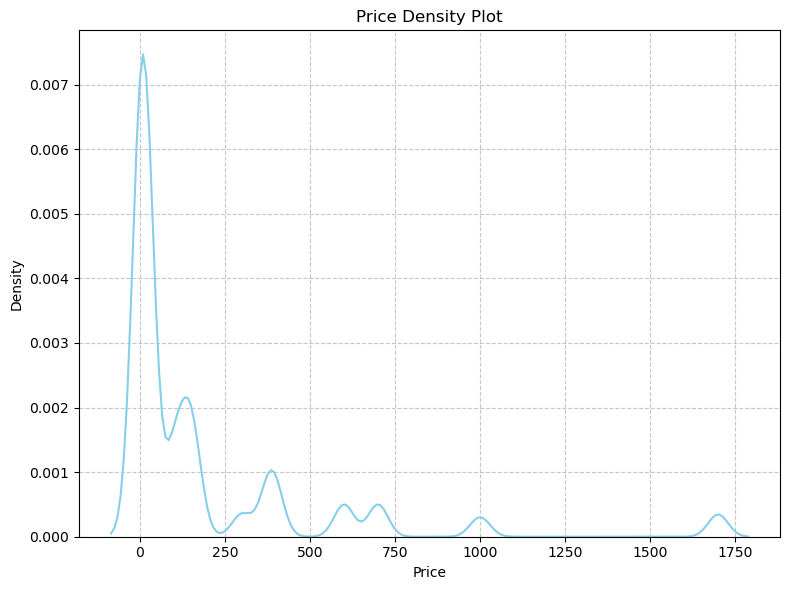

In [148]:
plt.figure(figsize=(8, 6))
sns.kdeplot(prices, color='skyblue')
plt.title('Price Density Plot')
plt.xlabel('Price')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Finding correlation between the quantity ordered and the product price

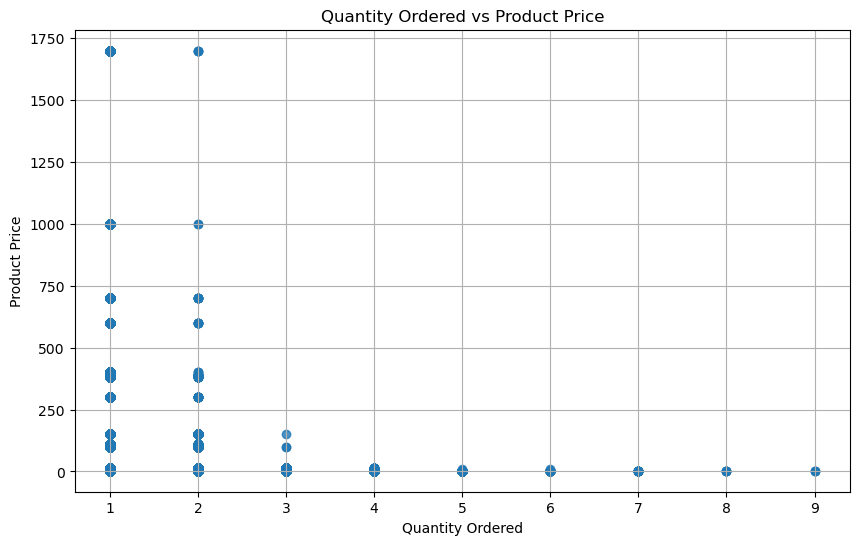

In [149]:
# Plot a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity_Ordered'], df['Product_price'], alpha=.8)
plt.title('Quantity Ordered vs Product Price')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product Price')
plt.grid(True)

plt.show()

In [150]:
# Conclusion: It seems no correlation between product quantity and product price , But We can undersatnd that most of people ordering 1 or 2 quantity , so in oerder to increase sales, we can give offer,discount or cashback 

In [151]:
quantity_by_product = df[['Quantity_Ordered','Product_name']].groupby('Product_name').sum().sort_values('Quantity_Ordered')
percentage_order_product= (quantity_by_product/quantity_by_product["Quantity_Ordered"].sum()*100).round(2)
percentage_order_product

,Quantity_Ordered
Product_name,
LG Dryer,0.31
LG Washing Machine,0.32
Vareebadd Phone,0.99
20in Monitor,1.98
ThinkPad Laptop,1.98
Macbook Pro Laptop,2.26
Flatscreen TV,2.30
Google Phone,2.65
34in Ultrawide Monitor,2.97


# How many percentage(%) quantity orders based on products name  

C:\Users\dell\AppData\Local\Temp\ipykernel_26220\2645657370.py:22: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Normalized Quantity')


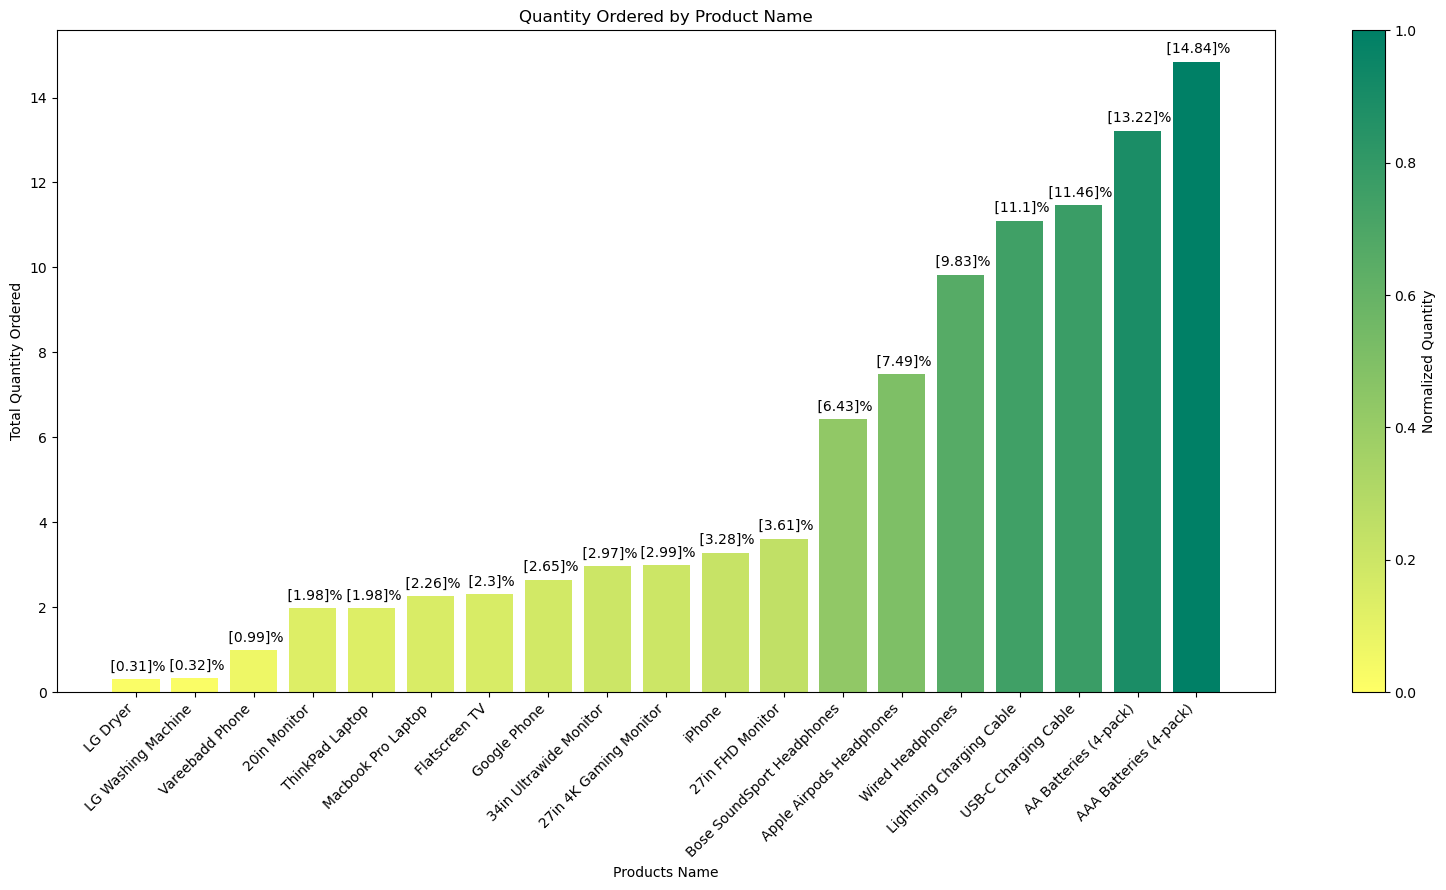

In [152]:
quantity_by_product = df[['Quantity_Ordered','Product_name']].groupby('Product_name').sum().sort_values('Quantity_Ordered')

plt.figure(figsize=(16,9))

quantities=percentage_order_product['Quantity_Ordered']

# Normalize the quantities inversely to [0, 1] range
normalized_quantities = np.array(quantities) / max(quantities)

# Define a colormap
cmap = plt.get_cmap('summer_r')

plt.bar(x=percentage_order_product.index,height=percentage_order_product['Quantity_Ordered'] , color=cmap(normalized_quantities))


for i,j in enumerate(percentage_order_product.values):
    plt.text(percentage_order_product.index[i],percentage_order_product.values[i]+.2,str(f" {j}%"),ha='center')
    
# Add color bar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
plt.colorbar(sm, label='Normalized Quantity')


plt.title('Quantity Ordered by Product Name')
plt.xlabel('Products Name')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [153]:
#Conclusion: There are 4 products in last gets maxi orders, so In order to sales we can improve these products quality, packaging, decrease delivery time, runs more adds etc   ​

# Products order trends each hours in day 

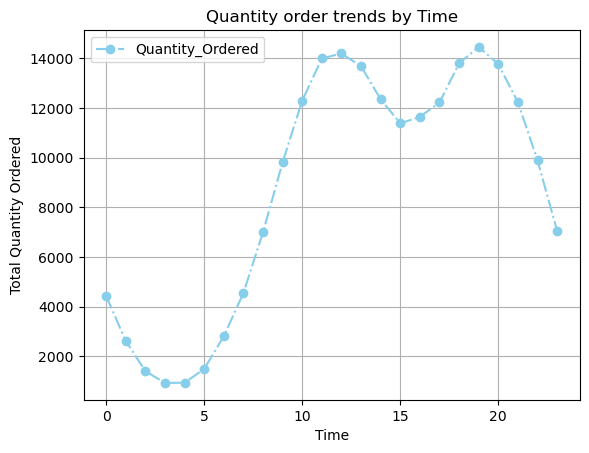

In [154]:

time_order = df[['Quantity_Ordered',"Hour"]].groupby("Hour").sum()
time_order.plot(kind='line', color='skyblue', marker='o', linestyle='-.',grid=True)
plt.title('Quantity order trends by Time')
plt.xlabel('Time')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

In [155]:
#Conclusion: Observe Quantity orders trends by each hours , Maxi quantity order placed between 10 AM -02 PM and 05 PM - 09 PM. so keep products available between this time and can runs more adds on this slab.


# How much percentage(%) product orders by each Cities

In [156]:
Order_City= df[["City","Quantity_Ordered"]].groupby("City").sum()
percentage_order= (Order_City/Order_City["Quantity_Ordered"].sum()*100).round(2)
percentage_order
Order_City

,Quantity_Ordered
City,
Atlanta,16584
Austin,11137
Boston,22494
Dallas,16707
Los Angeles,33247
New York City,27903
Portland,14037
San Francisco,50169
Seattle,16534


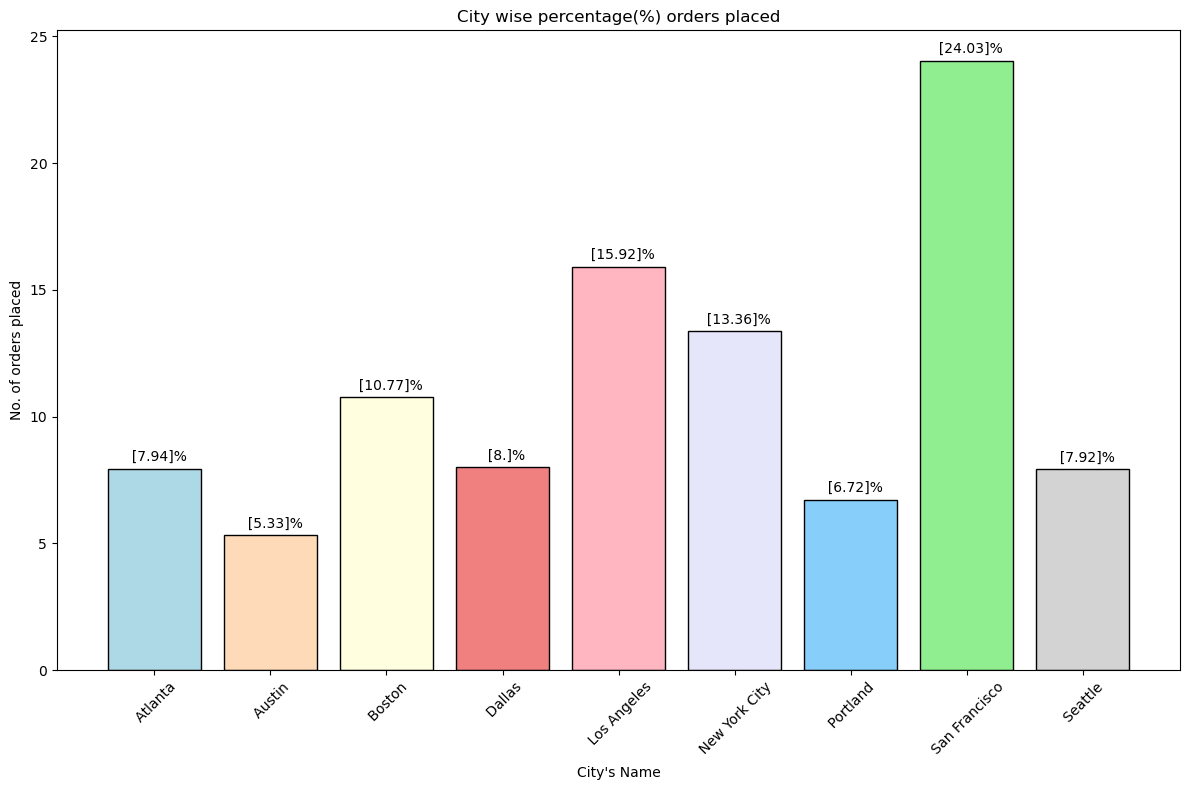

In [157]:
#Order_City.plot(kind="bar", color="skyblue")
plt.figure(figsize=(12,8))
offset=.3
plt.bar(x=percentage_order.index,height=percentage_order["Quantity_Ordered"],
        color = ["lightblue", "peachpuff", "lightyellow", "lightcoral", "lightpink", "lavender", "lightskyblue",
                 "lightgreen", "lightgray"],edgecolor='black')

for i,j in enumerate(percentage_order.values):
       plt.text(percentage_order.index[i],percentage_order.values[i]+offset,str(f"  {j}%"),ha="center")

plt.title("City wise percentage(%) orders placed")
plt.xlabel("City's Name")
plt.ylabel("No. of orders placed")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [158]:
# Conclusion: New York City, Los Angeles, and San Francisco, CA people orders more products, So in this city make product available always and can give discount, offer's and reduce delivery charges, time to increase sells.

# Which state contributing more on sales and orders quantity 

In [159]:
state_quantity_price=df[["State","Product_price","Quantity_Ordered"]].groupby("State").sum()

state_quantity_price["Percent Sales"]=state_quantity_price["Product_price"]/state_quantity_price["Product_price"].sum()*100
state_quantity_price["Percentage Orders"]=state_quantity_price["Quantity_Ordered"]/state_quantity_price["Quantity_Ordered"].sum()*100
state_quantity_price.drop(columns=["Product_price","Quantity_Ordered"],inplace=True)
state_quantity_price

,Percent Sales,Percentage Orders
State,,
CA,39.755174,39.947896
GA,8.109733,7.942072
MA,10.607467,10.772369
ME,1.303905,1.315059
NY,13.521784,13.362738
OR,5.428176,5.407256
TX,13.304188,13.334483
WA,7.969574,7.918127


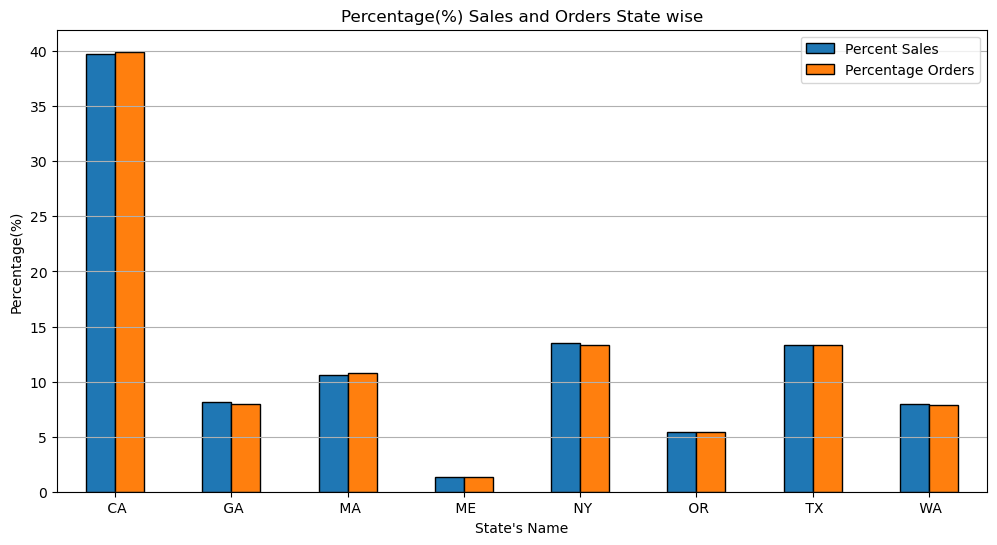

In [160]:
state_quantity_price.plot(kind="bar",edgecolor="black",figsize=(12, 6))

plt.title("Percentage(%) Sales and Orders State wise")
plt.ylabel("Percentage(%)")
plt.xlabel("State's Name")
plt.xticks(rotation=0)
plt.grid(axis='y')
#plt.tight_layout()
plt.show()